# <b>Extractive Summarization POC</b>

### <b>Importing the libraries & reading Data required for Extractive POC</b>

In [ ]:
# Importing genism package and summarizer
import gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
!pip install wikipedia
import wikipedia
import textwrap

# Wrap this text.
wrapper = textwrap.TextWrapper(width=150)  

#importing sumy
!pip install sumy
import sumy
import nltk
nltk.download('punkt')

# Importing the parser,tokenizer and summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer


import re
import json
import numpy as np
import pandas as pd

from sumy.summarizers.luhn import LuhnSummarizer as Luhn                        # Luhn
from sumy.summarizers.lsa import LsaSummarizer as LSA                           # LSA Summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer as LexRank              # Lex-Rank
from sumy.summarizers.text_rank import TextRankSummarizer as TextRank           # Text-Rank
from sumy.summarizers.sum_basic import SumBasicSummarizer as SumBasic           # Sum-Basic
from sumy.summarizers.kl import KLSummarizer as KLSum                           # KL-Sum


from tqdm import tqdm_notebook
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
!pip install transformers
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import EncoderDecoderModel, AutoTokenizer, pipeline
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
!pip install bert-extractive-summarizer

!pip install rouge
from rouge import Rouge
#from google.colab import drive


* We will be using below wikipedial page(Netherlands) for text Summarization

<b>URL:- https://en.wikipedia.org/wiki/Netherlands </b>

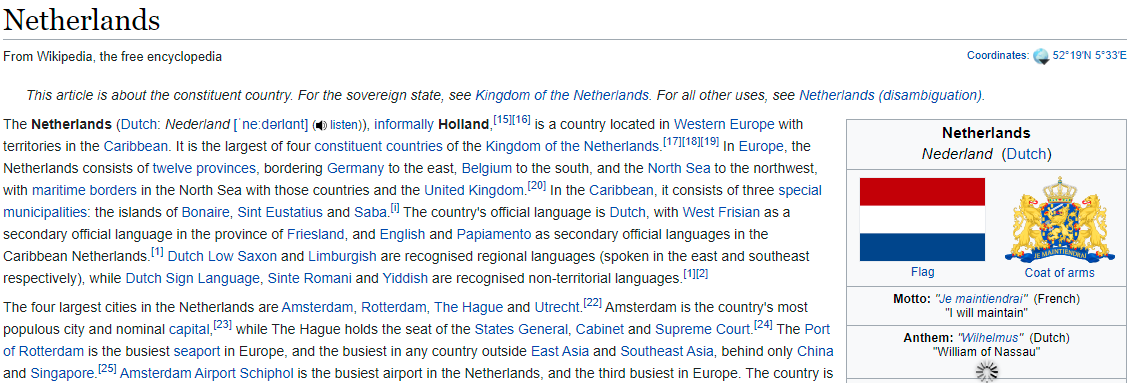

In [ ]:
# Get wiki content.
wikisearch = wikipedia.page("Netherlands")
wikicontent = wikisearch.content

### <b><u>Mehtod 01:-</u> Text Summarization using sumy -LSA (Latent semantic analysis)

In [ ]:
# importing the summarizer
from sumy.summarizers.lsa import LsaSummarizer
# Initializing the parser
my_parser = PlaintextParser.from_string(wikicontent,Tokenizer('english'))
# creating the LSA summarizer with summary of 10 sentences
lsa_summarizer=LsaSummarizer()

lsa_summary= lsa_summarizer(my_parser.document,30)
FinalSentece=[]
for sentence in lsa_summary:
  FinalSentece.append(sentence)
Finalsent=''.join(str(v) for v in FinalSentece)

Summarized = wrapper.fill(text=Finalsent).strip()
print(Summarized)

rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(Finalsent,wikicontent,avg=True)

The oldest human (Neanderthal) traces were found in higher soils, near Maastricht, from what is believed to be about 250,000 years ago.By the time
this migration was complete, around 250 BC, a few general cultural and linguistic groups had emerged.Powerful local nobles turned their cities,
counties and duchies into private kingdoms that felt little sense of obligation to the emperor.The level of ferocity exhibited by both sides can be
gleaned from a Dutch chronicler's report: On more than one occasion men were seen hanging their own brothers, who had been taken prisoners in the
enemy's ranks... A Spaniard had ceased to be human in their eyes.Alba boasted of having executed 18,600, but this figure does not include those who
perished by war and famine.After declaring their independence, the provinces of Holland, Zeeland, Groningen, Friesland, Utrecht, Overijssel, and
Gelderland formed a confederation.During the occupation, over 100,000 Dutch Jews were rounded up and transported to Nazi e

{'rouge-1': {'f': 0.14761215492804952, 'p': 1.0, 'r': 0.0796875},
 'rouge-2': {'f': 0.07902928578469061,
  'p': 0.9569230769230769,
  'r': 0.04121661917699291},
 'rouge-l': {'f': 0.14761215492804952, 'p': 1.0, 'r': 0.0796875}}

### <b><u>Mehtod 02:-</u> Text Summarization using LexRank summarizer

In [ ]:

# Initializing the parser
my_parser = PlaintextParser.from_string(wikicontent,Tokenizer('english'))
#creating a LexRank summary of 20 sentences.
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=10)
FinalSentece=[]
for sentence in lexrank_summary:
    FinalSentece.append(sentence)
Finalsent=''.join(str(v) for v in FinalSentece)

Summarized = wrapper.fill(text=Finalsent).strip()
print(Summarized)

rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(Finalsent,wikicontent,avg=True)

It is the largest of four constituent countries of the Kingdom of the Netherlands.The Low Countries today is a designation that includes the countries
of the Netherlands, Belgium and Luxembourg, although in most Romance languages, the term "Low Countries" is used as the name for the Netherlands
specifically.=== Holland === The Netherlands is also referred to as Holland in various languages, including English.Many moved on to England and came
to be known as Anglo-Saxons, but those who stayed would be referred to as Frisians and their language as Frisian, named after the land that was once
inhabited by Frisii.Although in the English language they are considered part of the Leeward Islands, French, Spanish, Dutch and the English spoken
locally consider them part of the Windward Islands.The Dutch army was used throughout the Dutch Empire.After 1830, it was deployed mainly in the Dutch
colonies, as the Netherlands remained neutral in European wars (including the First World War), until the 

{'rouge-1': {'f': 0.045138299236387916, 'p': 1.0, 'r': 0.02309027777777778},
 'rouge-2': {'f': 0.025505198878576833, 'p': 0.975, 'r': 0.012921608905970446},
 'rouge-l': {'f': 0.045138299236387916, 'p': 1.0, 'r': 0.02309027777777778}}

### <b><u>Mehtod 03:-</u> Text Summarization using Gensim with TextRank

In [ ]:
# Summary by 100% of the original content
summary_ratio = summarize(wikicontent, ratio = 1.00)

#summary by count of words
summary_wordcount = summarize(wikicontent, word_count = 330,split=False)
Summarized = wrapper.fill(text=summary_wordcount)
print(Summarized)

rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(Summarized,wikicontent,avg=True)

#print("*************************************************")
#keywords(wikicontent, ratio=1.0)
#print(summary_wordcount)

Dutch Low Saxon and Limburgish are recognised regional languages (spoken in the east and southeast respectively), while Dutch Sign Language, Sinte
Romani, and Yiddish are recognised non-territorial languages.The four largest cities in the Netherlands are Amsterdam, Rotterdam, The Hague, and
Utrecht. It hosts several intergovernmental organisations and international courts, many of which are centred in The Hague, which is consequently
dubbed 'the world's legal capital'.Netherlands literally means "lower countries" in reference to its low elevation and flat topography, with only
about 50% of its land exceeding 1 m (3.3 ft) above sea level, and nearly 26% falling below sea level. In English, the Netherlands is also called
Holland or (part of) the Low Countries, whereas the term "Dutch" is used as the demonym and adjectival form. The Eighty Years' War (1568–1648) divided
the Low Countries into an independent northern Dutch Republic (or Latinised Belgica Foederata, "Federated Netherlands", 

{'rouge-1': {'f': 0.07356629255029604,
  'p': 0.995475113122172,
  'r': 0.03819444444444445},
 'rouge-2': {'f': 0.03959753286906882,
  'p': 0.9713375796178344,
  'r': 0.0202107216221589},
 'rouge-l': {'f': 0.07356629255029604,
  'p': 0.995475113122172,
  'r': 0.03819444444444445}}

## <b><u>Method 04:-</u> Comparitive study of different extractive summary of models</b>


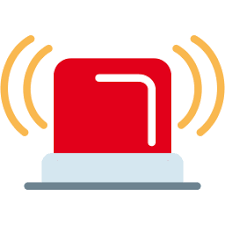

### <b> THIS WILL TAKE more than 25 MINS TO RUN, DOWNLOAD THE RESULT CLICKING THE BELOW LINK </B>
<a> https://drive.google.com/file/d/11CT3RB5KFO8IoXTm28IplMYdpuX0RX74/view?usp=sharing</a>

In [ ]:
def get_summaries(sentence_count):
  '''
  Process: Extracts Abstracts, Generates Seven Summaries and Append
  Returns: Combined Summaries and All Individual Summaries as Lists
  '''
  # Placeholders
  combined_summaries = []
  luhn_summaries = [] 
  lexrank_summaries = []
  textrank_summaries = []
  sumbasic_summaries = []
  kl_sum_summaries = []
 
  abstract_list = (wikicontent)
  count = 1

      # Parse and Tokenize
  parser = PlaintextParser.from_string(wikicontent, Tokenizer("english"))

    # Luhn Summarizer
  luhn_text = ''
  luhn = Luhn()
  luhn_summary = luhn(parser.document, sentence_count)
  for sent in luhn_summary:
    luhn_text += str(sent)
  luhn_summaries.append(luhn_text)

    # LexRank Summarizer
  lex_text = ''
  lex = LexRank()
  lex_summary = lex(parser.document, sentence_count)
  for sent in lex_summary:
    lex_text += str(sent)
  lexrank_summaries.append(lex_text)

    # TextRank Summarizer
  textrank_text = ''
  textrank = TextRank()
  textrank_summary = textrank(parser.document, sentence_count)
  for sent in textrank_summary:
      textrank_text += str(sent)
  textrank_summaries.append(textrank_text)

    # SumBasic Summarizer
  sum_basic_text = ''
  sumbasic = SumBasic()
  sumbasic_summary = sumbasic(parser.document, sentence_count)
  for sent in sumbasic_summary:
    sum_basic_text += str(sent)
  sumbasic_summaries.append(sum_basic_text)

    # KLSum Summarizer
  kl_text = ''
  kl = KLSum()
  kl_summary = kl(parser.document, sentence_count)
  for sent in kl_summary:
    kl_text += str(sent)
  kl_sum_summaries.append(kl_text)

    # Concatenation of Summaries
  combined_text = luhn_text + lex_text + textrank_text + sum_basic_text + kl_text
  combined_summaries.append(combined_text)

    # Progress
  if (count%1000 == 0):
    print('Summarization Complete for Abstract ID = {}'.format(count))
  count += 1

  return combined_summaries, luhn_summaries, lexrank_summaries, textrank_summaries, sumbasic_summaries, kl_sum_summaries


 # Data Preparation into Pandas Dataframe for Final Summarization Model Input and Other Tasks
def get_data(combined_summaries, luhn_summaries, lexrank_summaries, textrank_summaries, sumbasic_summaries, kl_sum_summaries, get_excel = True):
  '''
  Generate Dataframe With All Summaries and return final DF
  '''
  

  raw_dataframe = {'Combined Abstract'   : combined_summaries, 
                   'Luhn Summaries'      : luhn_summaries,
                   'LexRank Summaries'   : lexrank_summaries,
                   'TextRank Summaries'  : textrank_summaries,
                   'SumBasic Summaries'  : sumbasic_summaries,
                   'KL Summaries'        : kl_sum_summaries}
  df = pd.DataFrame(raw_dataframe, columns = ['Combined Abstract',
                                              'Luhn Summaries',
                                              'LexRank Summaries', 
                                              'TextRank Summaries',
                                              'SumBasic Summaries',
                                              'KL Summaries'])
  
  return df


In [ ]:
 Parameters
#num_examples   = 10000
sentence_count = 10

# Summarization
combines, luhns, lexranks, textranks, sumbasics, kl_sums = get_summaries(sentence_count)
 
# Dataset Preparation (Download Excel from Local Storage of Colab)
final_data_frame = get_data(combines, luhns, lexranks, textranks, sumbasics, kl_sums, get_excel = True)
final_data_frame

,Combined Abstract,Luhn Summaries,LexRank Summaries,TextRank Summaries,SumBasic Summaries,KL Summaries
0,"With a population of 17.4 million people, all ...","With a population of 17.4 million people, all ...",It is the largest of four constituent countrie...,"In Europe, the Netherlands consists of twelve ...","A sangre, a carne, a fuego, a sacco!""To blood,...","Most of the areas below sea level, known as po..."


In [ ]:
from google.colab import files

final_data_frame.to_csv('Combined.csv')
files.download('Combined.csv')

### ********************************************************************************

### <b><u>Method 04-Part A </u></b> --> Luhan Extractive summarizer

In [ ]:

      # Parse and Tokenize
parser = PlaintextParser.from_string(wikicontent, Tokenizer("english"))

luhn_summaries=[]
luhn_text = ''
luhn = Luhn()
luhn_summary = luhn(parser.document, 10)
for sent in luhn_summary:
      luhn_text += str(sent)
luhn_summaries.append(luhn_text)

Summarized = wrapper.fill(text=luhn_text)
print(Summarized)

rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(kl_text,wikicontent,avg=True)

With a population of 17.4 million people, all living within a total area of roughly 41,800 km2 (16,100 sq mi)—of which the land area is 33,500 km2
(12,900 sq mi)—the Netherlands is the 16th most densely populated country in the world and the second-most densely populated country in the European
Union, with a density of 521 people per square kilometre (1,350 people/sq mi).Colloquially the country is also by the Dutch often referred to as
Holland, although to lesser extent outside the two provinces North and South Holland, where it may even be used as a pejorative term, e.g. Hollènder
(dialect) in Maastricht.The plural Nederlanden has been used in many different connotations in the past, but since 1815, it is only used in the
official name Koninkrijk der Nederlanden ("Kingdom of the Netherlands").After he died in 869, Lotharingia was partitioned, into Upper and Lower
Lotharingia, the latter part comprising the Low Countries that technically became part of East Francia in 870, although it

{'rouge-1': {'f': 0.03312275876594316, 'p': 1.0, 'r': 0.016840277777777777},
 'rouge-2': {'f': 0.01837752672142289,
  'p': 0.9655172413793104,
  'r': 0.009277052547876218},
 'rouge-l': {'f': 0.03312275876594316, 'p': 1.0, 'r': 0.016840277777777777}}

### <b><u>Method 04-Part B</u></b> --> KLSum Extractive summarizer

In [ ]:

      # Parse and Tokenize
parser = PlaintextParser.from_string(wikicontent, Tokenizer("english"))

    # KLSum Summarizer
kl_sum_summaries=[]
kl_text = ''
kl = KLSum()
kl_summary = kl(parser.document, 10)
for sent in kl_summary:
      kl_text += str(sent)
kl_sum_summaries.append(kl_text)

Summarized = wrapper.fill(text=kl_text)
print(Summarized)

Most of the areas below sea level, known as polders, are the result of land reclamation that began in the 14th century.In the first part of Gallia
Belgica, the area south of the Limes became part of the Roman province of Germania Inferior.The Dutch settlement in North America began with the
founding of New Amsterdam on the southern part of Manhattan in 1614.In 2017, The Economist ranked the Netherlands as the 11th most democratic country
in the world.The head of government is the Prime Minister of the Netherlands, who often is the leader of the largest party of the coalition.They meet
regularly with the government in the Social-Economic Council.It is the 67th most populous country in the world.The majority of the population of the
Netherlands is ethnically Dutch.People in the south are on average about 2 cm (0.8 inches) shorter than those in the north.In the south of the
Netherlands there are some festivals that rarely or never occur in the rest of the Netherlands.


In [ ]:

rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(kl_text,wikicontent,avg=True)


 ********************************************************


{'rouge-1': {'f': 0.03312275876594316, 'p': 1.0, 'r': 0.016840277777777777},
 'rouge-2': {'f': 0.01837752672142289,
  'p': 0.9655172413793104,
  'r': 0.009277052547876218},
 'rouge-l': {'f': 0.03312275876594316, 'p': 1.0, 'r': 0.016840277777777777}}

### <b><u>Method 04-Part C</u></b>:- --> textrank summarizer

In [ ]:

    # TextRank Summarizer
textrank_summaries=[]
textrank_text = ''
textrank = TextRank()
textrank_summary = textrank(parser.document, 6)
for sent in textrank_summary:
        textrank_text += str(sent)
textrank_summaries.append(textrank_text)

Summarized = wrapper.fill(text=textrank_text)
print(Summarized)


rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(textrank_text,wikicontent,avg=True)

It managed to turn the tide by inundating parts of Holland but could never recover to its former glory again and went into a state of a general
decline in the 18th century, with economic competition from England and long-standing rivalries between the two main factions in Dutch society, the
republican Staatsgezinden and the supporters of the stadtholder the Prinsgezinden as main political factions.Since suffrage became universal in 1917,
the Dutch political system has been dominated by three families of political parties: the strongest of which were the Christian Democrats, currently
represented by the Christian Democratic Appeal (CDA); second were the Social Democrats, represented by the Labour Party (PvdA); and third were the
Liberals, of which the right-wing People's Party for Freedom and Democracy (VVD) is the main representative.Some 150,000 to 200,000 people living in
the Netherlands are expatriates, mostly concentrated in and around Amsterdam and The Hague, now constituting almo

{'rouge-1': {'f': 0.07035175811519913, 'p': 1.0, 'r': 0.036458333333333336},
 'rouge-2': {'f': 0.04088254339727914,
  'p': 0.987460815047022,
  'r': 0.02087336823272149},
 'rouge-l': {'f': 0.07035175811519913, 'p': 1.0, 'r': 0.036458333333333336}}

### <b><u>Method 04-Part D</b></u> --> Sumbasic summarizer

In [ ]:

    # SumBasic Summarizer
sumbasic_summaries=[]
sum_basic_text = ''
sumbasic = SumBasic()
sumbasic_summary = sumbasic(parser.document, 40)
for sent in sumbasic_summary:
  sum_basic_text += str(sent)
sumbasic_summaries.append(sum_basic_text)

Summarized = wrapper.fill(text=sum_basic_text)
print(Summarized)


rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(textrank_text,wikicontent,avg=True)

There is diversity even within languages.== History ===== Prehistory (before 800 BC) ====== High Middle Ages (1000–1384) ===A sangre, a carne, a
fuego, a sacco!"To blood, to the flesh, to fire, to sack!)=== Batavian Republic and Kingdom (1795–1890) ===Nearly 17% of the country's land area is
reclaimed from the sea and from lakes.By the 13th century windmills had come into use to pump water out of areas below sea level.=== Delta Works
===Within this island group:=== Political parties ===Geert Wilders' far-right party lost its support.=== Government ====== Military ===== Economy ==In
May 2013, inflation was at 2.8% per year.=== Natural gas ===Of these, 1.4 million (8.5%) were born outside the EU and 0.43 million (2.6%) were born in
another EU Member State.=== Language ===It is widely spoken on these islands.Only during the last three years in VWO one foreign language is
mandatory.Denominational splits in 1834 and in 1886 diversified Dutch Calvinism.=== Education ====== Healthcare ===Home

{'rouge-1': {'f': 0.07035175811519913, 'p': 1.0, 'r': 0.036458333333333336},
 'rouge-2': {'f': 0.04088254339727914,
  'p': 0.987460815047022,
  'r': 0.02087336823272149},
 'rouge-l': {'f': 0.07035175811519913, 'p': 1.0, 'r': 0.036458333333333336}}

## <b><u>Method 05</u>:- Bert extract Summarization</b>

model(
   
    body: str # The string body that you want to summarize

    ratio: float # The ratio of sentences that you want for the final summary
    
    min_length: int # Parameter to specify to remove sentences that are less than 40 characters
    
    max_length: int # Parameter to specify to remove sentences greater than the max length,
    
    num_sentences: Number of sentences to use. Overrides ratio if supplied.
)

In [ ]:
#!pip install bert-extractive-summarizer
from summarizer import Summarizer
model = Summarizer()
result = model(wikicontent, min_length=10,num_sentences=10)
full = ''.join(result)
Summarized = wrapper.fill(text=full).strip()
print(Summarized)


rouge=Rouge()
print("\n ********************************************************")
rouge.get_scores(Summarized,wikicontent,avg=True)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The Netherlands (Dutch: Nederland [ˈneːdərlɑnt] (listen)), informally Holland, is a country located in Western Europe with territories in the
Caribbean. During the Gallic Wars, the area south and west of the Rhine was conquered by Roman forces under Julius Caesar from 57 BC to 53 BC. ===
Military ===  The Netherlands has one of the oldest standing armies in Europe; it was first established as such by Maurice of Nassau in the late
1500s. == Economy ==  The Netherlands has a developed economy and has been playing a special role in the European economy for many centuries. However,
the unforeseen consequences of the country's huge energy wealth impacted the competitiveness of other sectors of the economy, leading to the theory of
Dutch disease. Groups that represent the non-religious in the Netherlands include Humanistisch Verbond. Although in the Netherlands as a whole
Christianity has become a minority, the Netherlands contains a Bible Belt from Zeeland to the northern parts of the provi

{'rouge-1': {'f': 0.06223717349287448, 'p': 1.0, 'r': 0.03211805555555555},
 'rouge-2': {'f': 0.03411236213104067,
  'p': 0.9703703703703703,
  'r': 0.01736134119673978},
 'rouge-l': {'f': 0.06223717349287448, 'p': 1.0, 'r': 0.03211805555555555}}

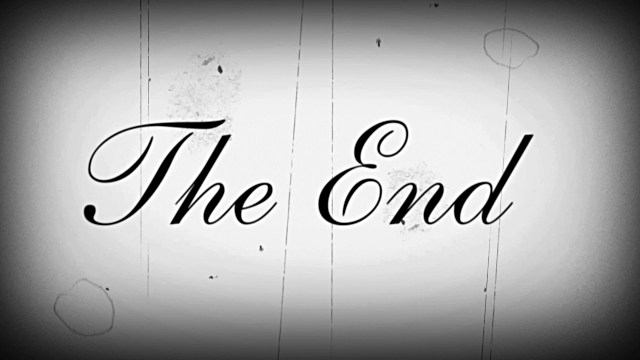